In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Your code here

# Re-enable warnings (optional)
warnings.filterwarnings("default")


In [3]:
# Define the path to the CSV file
url = "quantity_sums.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(url)

# Find unique CUSTOMER_NUMBER values and sort them
unique_customers = sorted(data['CUSTOMER_NUMBER'].unique())
print(unique_customers)

# Convert FOLIO_NUMBER to datetime format
data['FOLIO_NUMBER'] = pd.to_datetime(data['FOLIO_NUMBER'], format='%Y%m%d')

# Subset the data for each customer number
data_customer_1 = data[data['CUSTOMER_NUMBER'] == 1].drop(columns=['CUSTOMER_NUMBER'])
data_customer_2 = data[data['CUSTOMER_NUMBER'] == 2].drop(columns=['CUSTOMER_NUMBER'])
data_customer_3 = data[data['CUSTOMER_NUMBER'] == 3].drop(columns=['CUSTOMER_NUMBER'])
data_customer_5 = data[data['CUSTOMER_NUMBER'] == 5].drop(columns=['CUSTOMER_NUMBER'])
data_customer_6 = data[data['CUSTOMER_NUMBER'] == 6].drop(columns=['CUSTOMER_NUMBER'])
data_customer_7 = data[data['CUSTOMER_NUMBER'] == 7].drop(columns=['CUSTOMER_NUMBER'])
data_customer_8 = data[data['CUSTOMER_NUMBER'] == 8].drop(columns=['CUSTOMER_NUMBER'])
data_customer_9 = data[data['CUSTOMER_NUMBER'] == 9].drop(columns=['CUSTOMER_NUMBER'])
data_customer_12 = data[data['CUSTOMER_NUMBER'] == 12].drop(columns=['CUSTOMER_NUMBER'])
data_customer_13 = data[data['CUSTOMER_NUMBER'] == 13].drop(columns=['CUSTOMER_NUMBER'])
data_customer_14 = data[data['CUSTOMER_NUMBER'] == 14].drop(columns=['CUSTOMER_NUMBER'])
data_customer_15 = data[data['CUSTOMER_NUMBER'] == 15].drop(columns=['CUSTOMER_NUMBER'])
data_customer_16 = data[data['CUSTOMER_NUMBER'] == 16].drop(columns=['CUSTOMER_NUMBER'])
data_customer_17 = data[data['CUSTOMER_NUMBER'] == 17].drop(columns=['CUSTOMER_NUMBER'])
data_customer_18 = data[data['CUSTOMER_NUMBER'] == 18].drop(columns=['CUSTOMER_NUMBER'])
data_customer_19 = data[data['CUSTOMER_NUMBER'] == 19].drop(columns=['CUSTOMER_NUMBER'])

# Print unique TERMINAL_PRODUCT_NUMBER for each customer
for df, customer_number in zip(
    [data_customer_1, data_customer_2, data_customer_3, data_customer_5,
     data_customer_6, data_customer_7, data_customer_8, data_customer_9,
     data_customer_12, data_customer_13, data_customer_14, data_customer_15,
     data_customer_16, data_customer_17, data_customer_18, data_customer_19],
    [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19]
):
    unique_terminal_product_numbers = sorted(df['TERMINAL_PRODUCT_NUMBER'].unique())
    print(f"Customer {customer_number}: {unique_terminal_product_numbers}")

    
# Subset the data for TERMINAL_PRODUCT_NUMBER 4 and 7 for Customer 19
data_customer_19_product_number_4 = data_customer_19[data_customer_19['TERMINAL_PRODUCT_NUMBER'] == 4].drop(columns=['TERMINAL_PRODUCT_NUMBER'])
data_customer_19_product_number_7 = data_customer_19[data_customer_19['TERMINAL_PRODUCT_NUMBER'] == 7].drop(columns=['TERMINAL_PRODUCT_NUMBER'])

# Convert FOLIO_NUMBER to datetime format
data_customer_19_product_number_4['FOLIO_NUMBER'] = pd.to_datetime(data_customer_19_product_number_4['FOLIO_NUMBER'], format='%Y%m%d')
data_customer_19_product_number_7['FOLIO_NUMBER'] = pd.to_datetime(data_customer_19_product_number_7['FOLIO_NUMBER'], format='%Y%m%d')

# Create xts_data for plotting
xts_data_customer_19_product_number_4 = pd.Series(data_customer_19_product_number_4['ORDERED_QUANTITY'].values, index=data_customer_19_product_number_4['FOLIO_NUMBER'])
xts_data_customer_19_product_number_7 = pd.Series(data_customer_19_product_number_7['ORDERED_QUANTITY'].values, index=data_customer_19_product_number_7['FOLIO_NUMBER'])

# Subset the data for TERMINAL_PRODUCT_NUMBER 4 and 7 for Customer 15
data_customer_15_product_number_4 = data_customer_15[data_customer_15['TERMINAL_PRODUCT_NUMBER'] == 4].drop(columns=['TERMINAL_PRODUCT_NUMBER'])
data_customer_15_product_number_7 = data_customer_15[data_customer_15['TERMINAL_PRODUCT_NUMBER'] == 7].drop(columns=['TERMINAL_PRODUCT_NUMBER'])

# Convert FOLIO_NUMBER to datetime format
data_customer_15_product_number_4['FOLIO_NUMBER'] = pd.to_datetime(data_customer_15_product_number_4['FOLIO_NUMBER'], format='%Y%m%d')
data_customer_15_product_number_7['FOLIO_NUMBER'] = pd.to_datetime(data_customer_15_product_number_7['FOLIO_NUMBER'], format='%Y%m%d')

# Create xts_data for plotting
xts_data_customer_15_product_number_4 = pd.Series(data_customer_15_product_number_4['ORDERED_QUANTITY'].values, index=data_customer_15_product_number_4['FOLIO_NUMBER'])
xts_data_customer_15_product_number_7 = pd.Series(data_customer_15_product_number_7['ORDERED_QUANTITY'].values, index=data_customer_15_product_number_7['FOLIO_NUMBER'])

# Subset the data for TERMINAL_PRODUCT_NUMBER 4 and 7 for Customer 9
data_customer_9_product_number_4 = data_customer_9[data_customer_9['TERMINAL_PRODUCT_NUMBER'] == 4].drop(columns=['TERMINAL_PRODUCT_NUMBER'])
data_customer_9_product_number_7 = data_customer_9[data_customer_9['TERMINAL_PRODUCT_NUMBER'] == 7].drop(columns=['TERMINAL_PRODUCT_NUMBER'])

# Convert FOLIO_NUMBER to datetime format
data_customer_9_product_number_4['FOLIO_NUMBER'] = pd.to_datetime(data_customer_9_product_number_4['FOLIO_NUMBER'], format='%Y%m%d')
data_customer_9_product_number_7['FOLIO_NUMBER'] = pd.to_datetime(data_customer_9_product_number_7['FOLIO_NUMBER'], format='%Y%m%d')

# Create xts_data for plotting
xts_data_customer_9_product_number_4 = pd.Series(data_customer_9_product_number_4['ORDERED_QUANTITY'].values, index=data_customer_9_product_number_4['FOLIO_NUMBER'])
xts_data_customer_9_product_number_7 = pd.Series(data_customer_9_product_number_7['ORDERED_QUANTITY'].values, index=data_customer_9_product_number_7['FOLIO_NUMBER'])

[1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Customer 1: [4, 7]
Customer 2: [4, 7]
Customer 3: [4, 7, 8, 9, 10, 11]
Customer 5: [4, 7, 10, 12, 13]
Customer 6: [4, 7]
Customer 7: [4, 7]
Customer 8: [4, 7, 10, 11]
Customer 9: [4, 7]
Customer 12: [4, 7]
Customer 13: [4, 7]
Customer 14: [4, 7]
Customer 15: [4, 7]
Customer 16: [4, 7]
Customer 17: [4, 7]
Customer 18: [4, 7]
Customer 19: [4, 7]


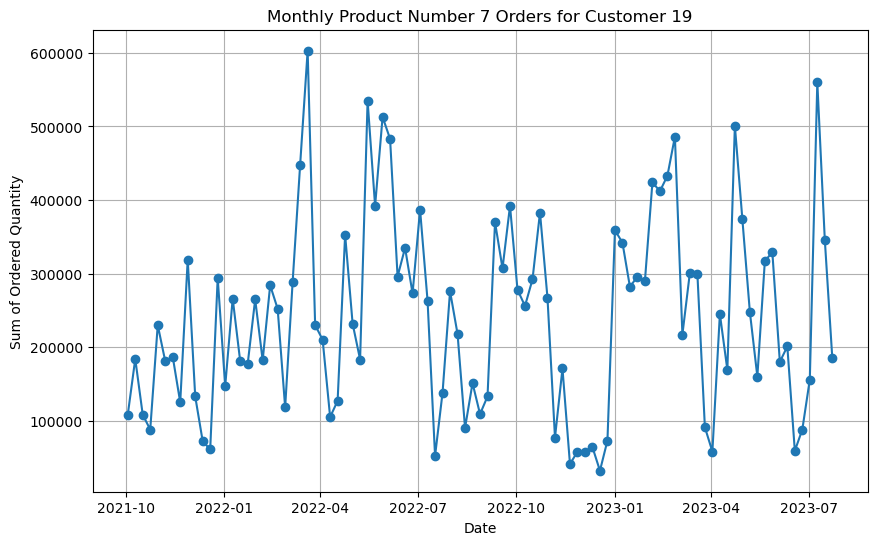

In [4]:
product_data_monthly_customer_9_product_4 = xts_data_customer_9_product_number_4.resample('W').sum()
plt.figure(figsize=(10, 6))
plt.plot(product_data_monthly_customer_9_product_4, marker='o')
plt.title('Monthly Product Number 7 Orders for Customer 19')
plt.xlabel('Date')
plt.ylabel('Sum of Ordered Quantity')
plt.grid(True)
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(product_data_monthly_customer_9_product_4)
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [6]:
adfuller_test(product_data_monthly_customer_9_product_4)

ADF Test Statistic : -5.842756957657256
p-value : 3.7439629686491945e-07
#Lags Used : 0
Number of Observations Used : 94
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


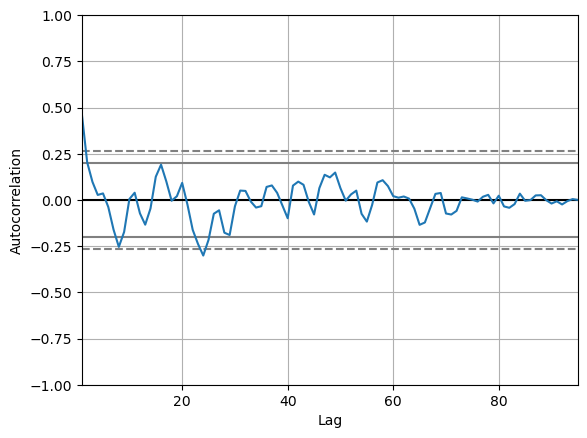

In [7]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(product_data_monthly_customer_9_product_4)
plt.show()

C:\Users\fedi1\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


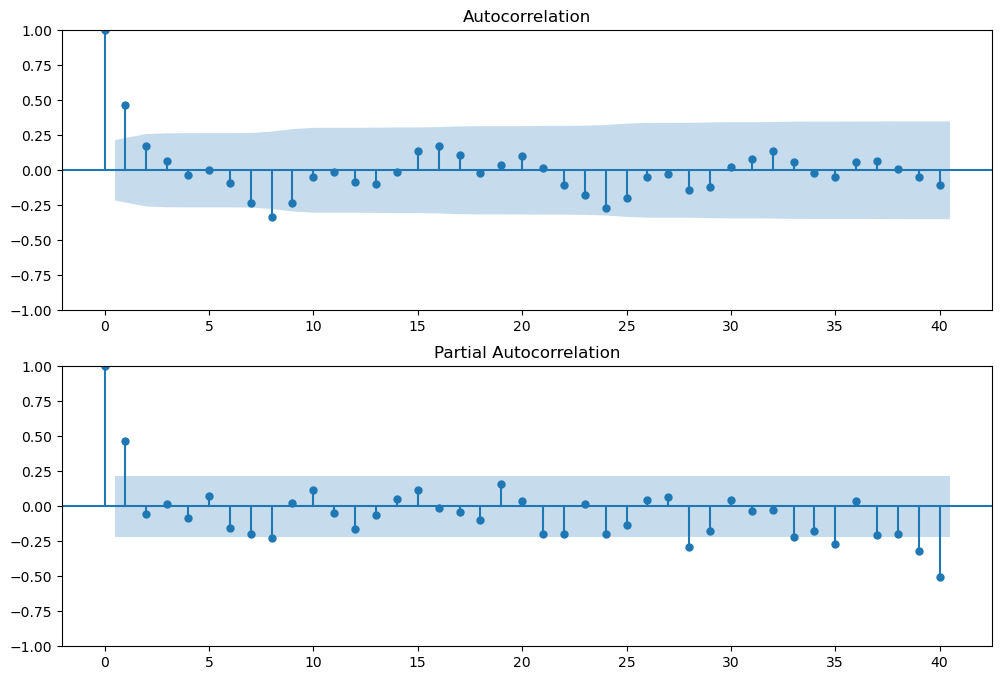

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
plot_acf(product_data_monthly_customer_9_product_4.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(product_data_monthly_customer_9_product_4.iloc[13:], lags=40, ax=ax2)
plt.show()

import itertools

# Define ranges for parameters
p = range(0, 3)  # p
d = range(0, 2)  # d
q = range(0, 3)  # q
P = range(0, 3)  # Seasonal P
D = range(0, 2)  # Seasonal D
Q = range(0, 3)  # Seasonal Q
S = [52]         # Seasonal period

# Generate all combinations of parameters
param_grid = itertools.product(p, d, q, P, D, Q, S)

best_mae = float('inf')
best_params = None

for params in param_grid:
    try:
        # Fit SARIMAX model
        model = sm.tsa.statespace.SARIMAX(product_data_monthly_customer_9_product_4,
                                          order=(params[0], params[1], params[2]),
                                          seasonal_order=(params[3], params[4], params[5], params[6]))
        results = model.fit()
        
        # Generate forecast
        forecast = results.predict(start=80, end=95, dynamic=True)
        
        # Get the actual values for the forecast period
        actual_values = product_data_monthly_customer_9_product_4[80:96]  # Assuming you're forecasting from index 80 to 95
        
        # Calculate MAE
        mae = mean_absolute_error(actual_values, forecast)
        
        # Check MAE
        if mae < best_mae:
            best_mae = mae
            best_params = params
    except:
        continue

print("Best MAE:", best_mae)
print("Best Parameters:", best_params)


C:\Users\fedi1\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: initialization. After release 0.14, this will raise.
  warnings.warn(


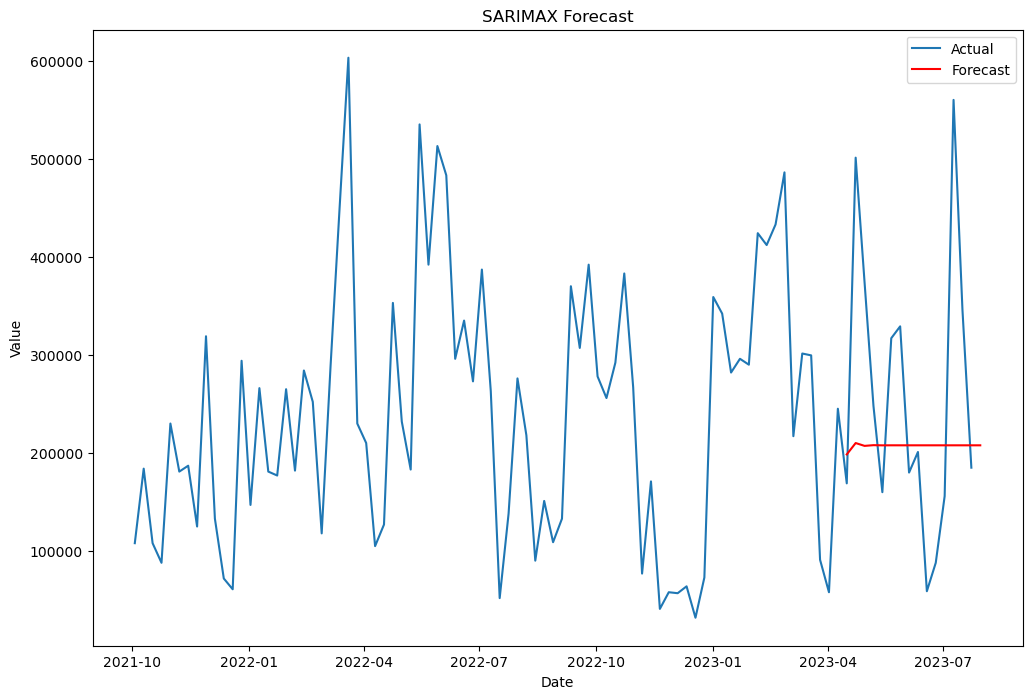

AIC: 2489.122703058507
Mean Absolute Error: 111586.43124013268


In [9]:
import statsmodels.api as sm
# Define SARIMAX model
model = sm.tsa.statespace.SARIMAX(product_data_monthly_customer_9_product_4,order = (1, 1, 0),seasonal_order = (0, 0, 0, 52)  )

# Fit the model with custom initialization
results = model.fit(initialization='approximate_diffuse')

# Generate forecast
forecast = results.predict(start=80, end=95, dynamic=True)

# Plot actual vs forecast
plt.figure(figsize=(12, 8))
plt.plot(product_data_monthly_customer_9_product_4, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

import numpy as np

# Calculate Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Get the actual values for the forecast period
actual_values = product_data_monthly_customer_9_product_4[80:96]  # Assuming you're forecasting from index 80 to 95

# Calculate MAE
mae = mean_absolute_error(actual_values, forecast)

# Display AIC
print("AIC:", results.aic)

# Display MAE
print("Mean Absolute Error:", mae)


In [10]:
# Split data into train and test sets (80% train, 20% test)
train_size = int(len(product_data_monthly_customer_15) * 0.8)
train_data, test_data = product_data_monthly_customer_15[:train_size], product_data_monthly_customer_15[train_size:]

# Fit SARIMA model
order = (0, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 2, 13)  # (P, D, Q, S)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_model = model.fit(disp=False)

# Forecast
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = sarima_model.predict(start=start, end=end, dynamic=False)

# Compute the difference between true and predicted values
errors = test_data.values.squeeze() - predictions

# Compute the mean squared error
mse = np.mean(errors ** 2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Visualize actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='SARIMA Predictions')
plt.title('SARIMA Forecast for Customer 19 Product Number 4')
plt.xlabel('Date')
plt.ylabel('Ordered Quantity')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'product_data_monthly_customer_15' is not defined

In [ ]:
# Forecast additional 6 months (6 * 4 weeks for weekly data)
forecast_horizon = 6 * 4

# Extend the end index for predictions
extended_end = end + forecast_horizon

# Forecast
extended_predictions = sarima_model.predict(start=start, end=extended_end, dynamic=False)

# Visualize actual vs. predicted including the forecasted period
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(pd.date_range(start=test_data.index[-1], periods=forecast_horizon + 1, freq='W')[1:], extended_predictions[-forecast_horizon:], label='Forecast')
plt.title('SARIMA Forecast for Customer 19 Product Number 4')
plt.xlabel('Date')
plt.ylabel('Ordered Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

autocorrelation_plot(product_data_monthly_customer_9_product_4)
plt.show()

# Fit the SARIMA Model
order = (1, 1, 0)  # (p, d, q)
seasonal_order = (2, 0, 2, 52)  # (P, D, Q, S)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_model = model.fit(disp=False)

# Forecast
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = sarima_model.predict(start=start, end=end, dynamic=False)

# Calculate residuals
residuals = test_data.values.squeeze() - predictions

# Compute the mean squared error
mse = np.mean(residuals ** 2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Visualize actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='SARIMA Predictions')
plt.title('SARIMA Forecast for Customer 15 Product Number 7')
plt.xlabel('Date')
plt.ylabel('Ordered Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Mean Absolute Percent Error
mape = np.mean(abs(residuals / test_data))
print('Mean Absolute Percent Error:', round(mape, 4))

# Calculate Root Mean Squared Error
print('Root Mean Squared Error:', rmse)

# Display AIC
print("AIC:", sarima_model.aic)


In [ ]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Get training and testing sets
train_size = int(len(product_data_monthly_customer_9_product_4) * 0.8)
train_data, test_data = product_data_monthly_customer_9_product_4[:train_size], product_data_monthly_customer_9_product_4[train_size:]

# Fit auto ARIMA model with a wider range of parameters
auto_model = auto_arima(train_data, seasonal=True, m=52, 
                        start_p=2, start_q=1, max_p=5, max_q=5,
                        start_P=2, start_Q=2, max_P=5, max_Q=5,
                        trace=True)

# Print the summary of the best model
print(auto_model.summary())